# Quality of Wine - She Codes Final Project 

by Daria Engel


The current project will provide supervised predictive models to identify the quality of wines, based on a variety of parameters, as country of origin, price, and variety of the wine. 
The provided models will help us to predict the quality of a wine, and therefore, help us to understand is it worth buying. 


# Import the modules

In [349]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Import the data
We will load in a dataset from the **[Kaggle website](https://www.kaggle.com/)**.
Specifically, we are going to use the **[Wine Reviews Dataset](https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv)**.

In [350]:
data = pd.read_csv (r'C:\Users\daria\OneDrive\Desktop\Final Project\winemag-data-130k-v2.csv')
df = pd.DataFrame(data)

# Preview of the first 5 rows of the data:

df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [351]:
# We will remove the first column, which contains the numbering of the rows.

df = df.drop(df.columns[0], axis=1) 
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


The columns included in the data are : 

+ **country** - the country the wine comes from.
+ **description** - the description of the wine by the taster.
+ **designation** - the vineyard within the winery provided the grapes for the wine.
+ **points** - the number of points the taster rated the wine on a scale of 1-100 (the current dataset includes only a range of 80-100 as the website which provided the datadset posts those scores only. 
+ **price** - the cost of a bottle of wine.
+ **province** - the province or state the wine comes from.
+ **region_1** - the wine-growing area in a province or state.
+ **region_2** - specific regions specified within a wine-growing area.
+ **taster_name** - the name of the taster of the wine. 
+ **taster_twitter_handle** - the Twitter username of the taster.
+ **title** - the title of the wine.
+ **variety** - the variety of the wine.
+ **winery** - the winery the wine was made by. 


# Identifying Missing Data

In the current section, we will focus on identifying the missing data in the dataset. 
First, we will check the type of data in each column :

In [352]:
df.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

We see that all the suggested data types are matching the real data types. 
Now, we will make a summary table with  
 + Features with missing data
 + The percent of the missing data for each feature
 + How many unique values each feature have

In [353]:
nulls = df.isnull().sum()
percentage_nulls = 100 * nulls / len(df)
data_types = df.dtypes
unique_values = df.nunique()
missing_values_table = pd.concat([nulls, percentage_nulls,unique_values, data_types], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage', 2: 'Unique Values', 3 : 'Data Types'})
missing_values_table

,Missing Values,Percentage,Unique Values,Data Types
country,63,0.048472,43,object
description,0,0.000000,119955,object
designation,37465,28.825661,37979,object
points,0,0.000000,21,int64
price,8996,6.921544,390,float64
province,63,0.048472,425,object
region_1,21247,16.347493,1229,object
region_2,79460,61.136715,17,object
taster_name,26244,20.192197,19,object
taster_twitter_handle,31213,24.015357,15,object


We will drop all the duplicate samples - 

In [354]:
print ("Data size prior duplicates removal: " + str(len(df.axes[0])) + " rows and " + str(len(df.axes[1])) + " columns.")
df = df.drop_duplicates()
print ("Data size after duplicates removal: " + str(len(df.axes[0])) + " rows and " + str(len(df.axes[1])) + " columns.")



Data size prior duplicates removal: 129971 rows and 13 columns.
Data size after duplicates removal: 119988 rows and 13 columns.


# Missing Data Imputation


+ The features **"country"**, **"province"** and **"variety"** have a negligible amount of missing values. Therefore, we will remove the samples with those values : 

In [355]:
df_no_small_missing = df[(df['country'].notnull())  & (df['variety'].notnull()) & (df['province'].notnull())]
df_no_small_missing.isnull().sum()

country                      0
description                  0
designation              34534
points                       0
price                     8391
province                     0
region_1                 19500
region_2                 73159
taster_name              24916
taster_twitter_handle    29445
title                        0
variety                      0
winery                       0
dtype: int64



+ The **"designation"** variable will not be used since 30% of the data is missing and the rest 70% includes many unique values (every second value is unique), which makes it not very useful to use. 
+ The **"region_2"** variable has a very high percentage of missing data (61%), we will drop it. This variable only contains regions in the USA and irrelevant to all other countries (see below).

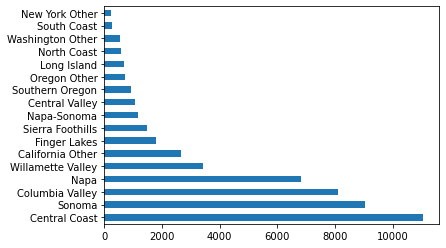

In [322]:
df_no_small_missing['region_2'].value_counts().plot(kind='barh')

+ For now, we will also drop the **"description"** variable, since it requires an NLP model. 
+ The variables **"title"** and **"taster_twitter_handle"** will be dropped. 
  + "title" data is very specific and unique, which is not informative for the models. 
  + "taster name" is covered by the "taster_name" variable. 

In [356]:
# Drop of all mentioned above columns 

df_relevant_features = df_no_small_missing.drop(['description','designation','region_2','title','taster_twitter_handle'], axis=1) 
df_relevant_features.head()

,country,points,price,province,region_1,taster_name,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks


In [357]:
nulls = df_relevant_features.isnull().sum()
percentage_nulls = 100 * nulls / len(df_relevant_features)
data_types = df_relevant_features.dtypes
unique_values = df_relevant_features.nunique()
missing_values_table = pd.concat([nulls, percentage_nulls,unique_values, data_types], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage', 2: 'Unique Values', 3 : 'Data Types'})
missing_values_table

,Missing Values,Percentage,Unique Values,Data Types
country,0,0.000000,43,object
points,0,0.000000,21,int64
price,8391,6.996698,390,float64
province,0,0.000000,425,object
region_1,19500,16.259756,1229,object
taster_name,24916,20.775799,19,object
variety,0,0.000000,701,object
winery,0,0.000000,16745,object


## Missing Data Imputaion - "price" variable 

We will start by imputing the missing data in the "price" variable (integer). The missing values will be replaced with a median of a price in each province, with a belief that these groups are homogeneous enough to obtain relatively accurate results.


In [358]:
df_relevant_features['price'] = df_relevant_features.groupby('province')['price'].transform(lambda x: x.fillna(x.median()))
print(df_relevant_features.isnull().sum())

country            0
points             0
price              3
province           0
region_1       19500
taster_name    24916
variety            0
winery             0
dtype: int64


We left with 3 missing values for the "price" variable. As possible to see below, all three have only one value per province and this value is missing. 


In [359]:
print (df_relevant_features.loc[pd.isna(df_relevant_features['price'])]['province'].value_counts())


Piekenierskloof    1
Egypt              1
Ceres Plateau      1
Name: province, dtype: int64


In [360]:
print (df_relevant_features.loc[df_relevant_features['province']=="Egypt"])
print (df_relevant_features.loc[df_relevant_features['province']=="Piekenierskloof"])
print (df_relevant_features.loc[df_relevant_features['province']=="Ceres Plateau"])


       country  points  price province region_1      taster_name   variety  \
110246   Egypt      84    NaN    Egypt      NaN  Susan Kostrzewa  Grenache   

                  winery  
110246  Sahara Vineyards  
            country  points  price         province region_1    taster_name  \
34865  South Africa      91    NaN  Piekenierskloof      NaN  Lauren Buzzeo   

         variety      winery  
34865  Red Blend  Neil Ellis  
            country  points  price       province region_1    taster_name  \
16766  South Africa      88    NaN  Ceres Plateau      NaN  Lauren Buzzeo   

          variety      winery  
16766  Pinot Noir  De Grendel  


Therefore, we will fill in those 3 values with the general median of all the data. 

In [361]:
df_relevant_features['price'].fillna(df_relevant_features['price'].median(), inplace=True)
print(df_relevant_features.isnull().sum())


country            0
points             0
price              0
province           0
region_1       19500
taster_name    24916
variety            0
winery             0
dtype: int64


## Missing Data Imputaion - "taster_name" variable 

Now we will impute the missing data in the "taster_name" variable (character). The missing values will be replaced with the most frequent taster in each country.

In the "price" variable we had a wider range of prices and following that, we were able to fill in the missing data based on the prices of smaller subgroups. 

In the "taster_name", we have only 19 unique values, and therefore, much fewer options for missing data filling. Following that, it is better to look at  higher-level subgoups. 

In [362]:
s=df_relevant_features.groupby('country')['taster_name'].transform(lambda x: x.mode().iat[0])
df_relevant_features.taster_name=df_relevant_features.taster_name.fillna(s)
print(df_relevant_features.isnull().sum())

country            0
points             0
price              0
province           0
region_1       19500
taster_name        0
variety            0
winery             0
dtype: int64


## Missing Data Imputaion - "region_1" variable 


We only left with the "region_1" variable missing data. 
First, we will check what are countries covered in the "region_1" variable - 

In [363]:
df_relevant_features.loc[pd.isna(df_relevant_features['region_1']) == False]['country'].value_counts()

US           50202
France       20282
Italy        17918
Spain         6109
Argentina     3495
Australia     2196
Canada         226
Name: country, dtype: int64

As we can see, the "region_1" feature includes data of only 7 countries out of all 43 countries which appear in the dataset. This means that it is impossible to fill in the missing data of all the other 36 countries. 

As a summary, after handling the missing data and dropping irrelevant columns, these are the columns we will use for the models. 

In [364]:
nulls_final = df_relevant_features.isnull().sum()
percentage_nulls_final = 100 * nulls_final / len(df_relevant_features)
data_types_final = df_relevant_features.dtypes
unique_values_final = df_relevant_features.nunique()
missing_values_table_final = pd.concat([nulls_final, percentage_nulls_final,unique_values_final, data_types_final], axis=1)
missing_values_table_final = missing_values_table_final.rename(columns = {0 : 'Missing Values', 1 : 'Percentage', 2: 'Unique Values', 3 : 'Data Types'})
missing_values_table_final

,Missing Values,Percentage,Unique Values,Data Types
country,0,0.000000,43,object
points,0,0.000000,21,int64
price,0,0.000000,405,float64
province,0,0.000000,425,object
region_1,19500,16.259756,1229,object
taster_name,0,0.000000,19,object
variety,0,0.000000,701,object
winery,0,0.000000,16745,object


# Data Distribution

Before starting working on the models for wine quality prediction, we will check the data distribution of both features and labels. If needed, we will transform the data in order to get a better quality model.  

### "country" Data Distribution

In [365]:
df_relevant_features['country'].value_counts()

US                        50457
France                    20353
Italy                     17940
Spain                      6116
Portugal                   5256
Chile                      4183
Argentina                  3544
Austria                    3034
Australia                  2197
Germany                    1992
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      432
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Macedoni

As we see, the big volume of the data is covered by the USA, France, and Italy. 

### "points" Data Distribution

88.44214862250683
3.093287251240293


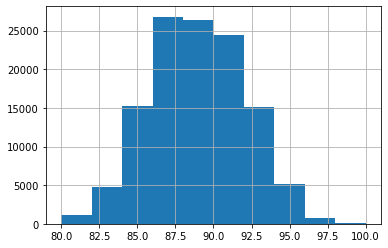

In [366]:
df_relevant_features['points'].hist()
print (df_relevant_features['points'].mean())
print (df_relevant_features['points'].std())

The scores are normally distributed with mean = 88.5 and standard deviation = 3. 

### "price" Data Distribution

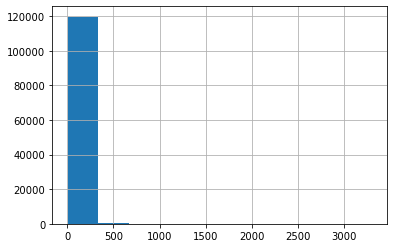

In [367]:
# An histogram of the "price" variable. 

df_relevant_features['price'].hist()

It seems that there are outliers in the data. To get a better view, we will create a boxplot, which will show us the possible outliers in a better way. 

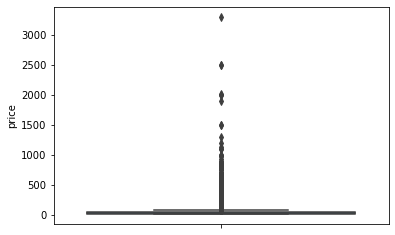

In [368]:
import seaborn as sns
sns.boxplot(y = df_relevant_features['price'])

Since those outliers are real prices of the wines and our data has a right-skewed distribution, we would make a **log transformation**. We expect that the transformation would provide asymptotically normally distributed data.

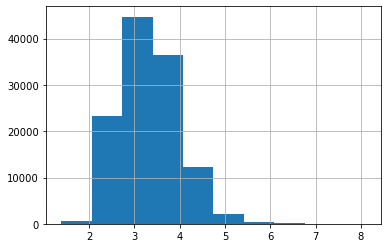

In [369]:
df_relevant_features['price'].apply(np.log).hist()

The transformed "price" variable has indeed a distribution that is much closer to be normal than the original distribution. Hence, we will use log(price) as a feature. 

In [370]:
df_relevant_features['price_log'] = np.log(df_relevant_features['price'])

### "taster_name" Data Distribution

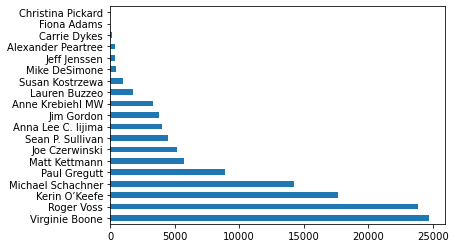

In [371]:
df_relevant_features['taster_name'].value_counts().plot(kind='barh')

We will skip other features since they have a big number of categories each and the summary will not be as informative as the summaries presented above. 